# **SELECCIÓN DE ATRIBUTOS - JUGADORES DE FIFA**

# 1. CARGA DE LOS DATOS

In [0]:
# Cargar Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# Carga de archivo de datos
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [0]:
# Crear dataframe con pandas

dfp1 = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')
dfp2 = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')
dfp3 = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')


# 2. PREPROCESAMIENTO DE LA INFORMACIÓN

In [0]:
# Identificar valores nulos
dfp1.isnull().sum()
dfp2.isnull().sum()
dfp3.isnull().sum()

Cons                 0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          76
GKKicking           76
GKPositioning       76
GKReflexes          76
Release Clause    1591
Length: 89, dtype: int64

In [0]:
# Borrar registros N/A
dfp1 = dfp1.dropna(subset=['GKHandling']) 
dfp2 = dfp2.dropna(subset=['GKHandling']) 
dfp3 = dfp3.dropna(subset=['GKHandling']) 
# Borrar todos jugadores diferentes de GK
#df=df[df.Position !="GK"]

# Borrar duplicados
#df.drop_duplicates(inplace=True)
# Borrar filas vacías de posiciones
#df=df.dropna(subset=['Position'])#Observación: En la variable Release Clause no se van a eliminar sus filas vacias dado que ésta variable no va ser
#tenida en cuenta, de esta forma se evita perder datos e información para el modelo.
#df.isnull().sum()
dfp1.shape

(18131, 89)

In [0]:
dfp1.head() #Para visualizar datos en el Dataframe

,Cons,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,?110.5M,?565K,2202.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,?77M,?405K,2228.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,?118.5M,?290K,2143.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,?72M,?260K,1471.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,?102M,?355K,2281.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


In [0]:
dfp1.shape

(18131, 89)

In [0]:
# Se seleccionan las variables

Var_Atrib = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'FKAccuracy', 'HeadingAccuracy', 'LongShots','Penalties', 'ShotPower', 'Volleys', 
       'ShortPassing', 'LongPassing',
       'Interceptions', 'Marking', 'SlidingTackle', 'StandingTackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'BallControl','Composure','Jumping', 
       'SprintSpeed','Position']
       

dfp1 = dfp1[Var_Atrib] #Dataframe del Modelo de predicción basado en resultados de K-means
dfp2 = dfp2[Var_Atrib] #Modelo predicción con label originales
dfp3 = dfp3[Var_Atrib] #Modeo de predicción con label "intuitivos"

dfp2.head()


,Aggression,Crossing,Curve,Dribbling,Finishing,FKAccuracy,HeadingAccuracy,LongShots,Penalties,ShotPower,Volleys,ShortPassing,LongPassing,Interceptions,Marking,SlidingTackle,StandingTackle,Strength,Vision,Acceleration,Agility,Reactions,Stamina,Balance,BallControl,Composure,Jumping,SprintSpeed,Position
0,48.0,84.0,93.0,97.0,95.0,94.0,70.0,94.0,75.0,85.0,86.0,90.0,87.0,22.0,33.0,26.0,28.0,59.0,94.0,91.0,91.0,95.0,72.0,95.0,96.0,96.0,68.0,86.0,RF
1,63.0,84.0,81.0,88.0,94.0,76.0,89.0,93.0,85.0,95.0,87.0,81.0,77.0,29.0,28.0,23.0,31.0,79.0,82.0,89.0,87.0,96.0,88.0,70.0,94.0,95.0,95.0,91.0,ST
2,56.0,79.0,88.0,96.0,87.0,87.0,62.0,82.0,81.0,80.0,84.0,84.0,78.0,36.0,27.0,33.0,24.0,49.0,87.0,94.0,96.0,94.0,81.0,84.0,95.0,94.0,61.0,90.0,LW
3,38.0,17.0,21.0,18.0,13.0,19.0,21.0,12.0,40.0,31.0,13.0,50.0,51.0,30.0,15.0,13.0,21.0,64.0,68.0,57.0,60.0,90.0,43.0,43.0,42.0,68.0,67.0,58.0,GK
4,76.0,93.0,85.0,86.0,82.0,83.0,55.0,91.0,79.0,91.0,82.0,92.0,91.0,61.0,68.0,51.0,58.0,75.0,94.0,78.0,79.0,91.0,90.0,77.0,91.0,88.0,63.0,76.0,RCM


In [0]:
dfp1.Position.unique() # Para validar Posiciones en los datos

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

Se crea función para etiquetar los datos


In [0]:
def Etiqueta_Posicion_Kmeans (row):
    #GOALKEEPER
    if(row.Position == "GK"):
      return '1'
    #DEFENSAS
    if(row.Position == "CB" or row.Position == "RCB" or row.Position == "LCB"):
        return '2'
    #MEDIO CAMPO
    if(row.Position == "LDM" or row.Position == "RDM" or row.Position == "RCM" or 
       row.Position == "LCM") :
        return '3'
    #ATAQUE
    if(row.Position == "RS" or row.Position == "ST" or row.Position == "LS" or row.Position == "CF" or row.Position == "LW"or row.Position == "RW"):
        return '4'
    else:
      return'5'

def Etiqueta_Posicion (row):
    #GOALKEEPER
    if(row.Position == "GK"):
        return '1'
    #DEFENSAS   
    if(row.Position == "RB" or row.Position == "CB" or row.Position == "LB" or row.Position == "RCB"or row.Position == "RWB" or 
       row.Position == "LCB"):
        return '2'
    #MEDIO CAMPO
    if(row.Position == "RM" or row.Position == "CM" or row.Position == "LM"
       or row.Position == "CAM" or row.Position == "LDM" or row.Position == "RDM"
       or row.Position == "LAM"or row.Position == "RAM" or row.Position == "CDM"
       or row.Position == "RCM"or row.Position == "LCM"):
        return '3'
    #ATAQUE
    if(row.Position == "RW" or row.Position == "CF" or row.Position == "LW" or 
       row.Position == "ST" or row.Position == "RS"or row.Position == "LS"
       or row.Position == "LF"or row.Position == "RF"):
        return '4'
    
dfp1['Position'] = dfp1.apply (lambda row: Etiqueta_Posicion_Kmeans(row),axis=1)
dfp3['Position'] = dfp3.apply (lambda row: Etiqueta_Posicion(row),axis=1)


In [0]:
dfp1.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,FKAccuracy,HeadingAccuracy,LongShots,Penalties,ShotPower,Volleys,ShortPassing,LongPassing,Interceptions,Marking,SlidingTackle,StandingTackle,Strength,Vision,Acceleration,Agility,Reactions,Stamina,Balance,BallControl,Composure,Jumping,SprintSpeed,Position
0,48.0,84.0,93.0,97.0,95.0,94.0,70.0,94.0,75.0,85.0,86.0,90.0,87.0,22.0,33.0,26.0,28.0,59.0,94.0,91.0,91.0,95.0,72.0,95.0,96.0,96.0,68.0,86.0,5
1,63.0,84.0,81.0,88.0,94.0,76.0,89.0,93.0,85.0,95.0,87.0,81.0,77.0,29.0,28.0,23.0,31.0,79.0,82.0,89.0,87.0,96.0,88.0,70.0,94.0,95.0,95.0,91.0,4
2,56.0,79.0,88.0,96.0,87.0,87.0,62.0,82.0,81.0,80.0,84.0,84.0,78.0,36.0,27.0,33.0,24.0,49.0,87.0,94.0,96.0,94.0,81.0,84.0,95.0,94.0,61.0,90.0,4
3,38.0,17.0,21.0,18.0,13.0,19.0,21.0,12.0,40.0,31.0,13.0,50.0,51.0,30.0,15.0,13.0,21.0,64.0,68.0,57.0,60.0,90.0,43.0,43.0,42.0,68.0,67.0,58.0,1
4,76.0,93.0,85.0,86.0,82.0,83.0,55.0,91.0,79.0,91.0,82.0,92.0,91.0,61.0,68.0,51.0,58.0,75.0,94.0,78.0,79.0,91.0,90.0,77.0,91.0,88.0,63.0,76.0,3


#3.CONSTRUCCIÓN DEL MODELO RANDOM FOREST

Primero se definen los datos de entrenamiento y de testeo

In [0]:
# Definir conjunto de datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dfp1.iloc[:,:-1], dfp1.iloc[:,-1], test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfp2.iloc[:,:-1], dfp2.iloc[:,-1], test_size=0.2, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(dfp3.iloc[:,:-1], dfp3.iloc[:,-1], test_size=0.2, random_state=0)


dfp1=dfp1.dropna(subset=['Position'])
dfp2=dfp2.dropna(subset=['Position'])
dfp3=dfp3.dropna(subset=['Position'])
dfp1 = dfp1.dropna() 
dfp2 = dfp2.dropna() 
dfp3 = dfp3.dropna() 

In [0]:
# Entrenamiento de los modelos
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

RForestPrueba1 = RandomForestClassifier(random_state=0).fit(X_train1,y_train1)
RForestPrueba2 = RandomForestClassifier(random_state=0).fit(X_train2,y_train2)
RForestPrueba3 = RandomForestClassifier(random_state=0).fit(X_train3,y_train3)

In [0]:
# Evaluación de modelos con accuracy

RForestscore1 = RForestPrueba1.score(X_test1, y_test1)
RForestscore2 = RForestPrueba2.score(X_test2, y_test2)
RForestscore3 = RForestPrueba3.score(X_test3, y_test3)

print ('Random Forest Accuracy (Default parameters): {}'.format(RForestscore1))
print ('Random Forest Accuracy (Default parameters): {}'.format(RForestscore2))
print ('Random Forest Accuracy (Default parameters): {}'.format(RForestscore3))

Random Forest Accuracy (Default parameters): 0.818307140887786
Random Forest Accuracy (Default parameters): 0.5253863134657837
Random Forest Accuracy (Default parameters): 0.8772513161540593


In [0]:
y_pred_prueba1 =RandomForestClassifier(random_state=0).fit(X_train1, y_train1).predict(X_test1)
y_pred_prueba2 =RandomForestClassifier(random_state=0).fit(X_train2, y_train2).predict(X_test2)
y_pred_prueba3 =RandomForestClassifier(random_state=0).fit(X_train3, y_train3).predict(X_test3)

In [0]:
print(classification_report(y_test1, y_pred_prueba1))
print(classification_report(y_test3,y_pred_prueba3))
print(classification_report(y_test2,y_pred_prueba2))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       391
           2       0.89      0.86      0.87       656
           3       0.40      0.04      0.07       251
           4       0.86      0.75      0.80       679
           5       0.76      0.91      0.82      1650

    accuracy                           0.82      3627
   macro avg       0.78      0.71      0.71      3627
weighted avg       0.80      0.82      0.79      3627

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.92      0.93      0.92      1139
           3       0.82      0.88      0.85      1376
           4       0.86      0.73      0.79       689

    accuracy                           0.88      3609
   macro avg       0.90      0.88      0.89      3609
weighted avg       0.88      0.88      0.88      3609

              precision    recall  f1-score   support

         CAM       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# Normalización de datos
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train3)
X_test_scaled = preprocessing.scale(X_test3)
X_train=X_train3
X_test=X_test3
y_train=y_train3
y_test=y_test3


In [0]:
X_train_scaled

array([[ 0.6385292 , -0.25529192, -0.00956486, ...,  0.20293472,
        -0.60880734,  0.83753497],
       [-1.65772087,  0.61605297,  0.31625759, ..., -0.58169304,
         0.66135527,  1.11028296],
       [ 0.12187293,  0.94280731,  0.69638378, ...,  0.46447731,
        -1.2862274 ,  0.56478697],
       ...,
       [ 0.8681542 ,  0.8338892 ,  0.91359875, ...,  0.37729644,
         0.83071029,  0.83753497],
       [-1.94475213, -2.21581792, -1.80158835, ..., -0.58169304,
        -0.35477482, -1.07170099],
       [-0.56700209, -0.03745569,  0.26195385, ...,  0.98756248,
         0.74603278,  0.15566498]])

In [0]:
# Comparación de resultados normalizados
print(classification_report(y_test3,y_pred_prueba3)) #Sin normalizar


RForestPrueba4 = RandomForestClassifier(random_state=0).fit(X_train_scaled,y_train3)
y_pred_prueba4 =RandomForestClassifier(random_state=0).fit(X_train_scaled, y_train3).predict(X_test_scaled)
print(classification_report(y_test,y_pred_prueba4)) #Con normalizado

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.92      0.93      0.92      1139
           3       0.82      0.88      0.85      1376
           4       0.86      0.73      0.79       689

    accuracy                           0.88      3609
   macro avg       0.90      0.88      0.89      3609
weighted avg       0.88      0.88      0.88      3609

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.92      0.93      0.92      1139
           3       0.82      0.87      0.85      1376
           4       0.86      0.74      0.79       689

    accuracy                           0.88      3609
   macro avg       0.90      0.88      0.89      3609
weighted avg       0.88      0.88      0.88      3609



In [0]:
y_train

17561     GK
6982      GK
397       RW
3845     CDM
6298      LB
        ... 
9236      ST
13139     ST
9856      LM
10813     LB
2736      LS
Name: Position, Length: 14495, dtype: object

A continuación se ejecuta una función que evalúa los resultados óptimos de profundidad(max_depth),número de árboles (n_estimators) y el numero de variables a evaluar antes de tomar decisión (max_features).


In [0]:
parameters_f = [{'max_depth': range(1,10), 'n_estimators': range(2,10,2), 'max_features': range(5,15)}]
clf_all_for_g = GridSearchCV(RandomForestClassifier(random_state=0), parameters_f)
clf_all_for_g.fit(X_train3, y_train3)

print('Best depth:',clf_all_for_g.best_estimator_.max_depth)
print('Best n trees:',clf_all_for_g.best_estimator_.n_estimators)
print('Best n features:',clf_all_for_g.best_estimator_.max_features)
print('Best n min samples split:',clf_all_for_g.best_estimator_.min_samples_split)
print('Best n min samples leaf:',clf_all_for_g.best_estimator_.min_samples_leaf)
print('Best n min samples leaf:',clf_all_for_g.best_estimator_.bootstrap)

In [0]:
from sklearn.ensemble import RandomForestRegressor

for i in range(20,40,2): #Se ejecuta un ciclo para validar el número de arboles óptimo para la construccion del modelo
  for j in range (6,20,2):#Se ejecuta un ciclo para validar la profundidad óptims para la construccion del modelo
    for k in range (6,20,2):#Se ejecuta un ciclo para validar el número variables óptimo a evaluar en cada nivel
      for l in range (2,3,1):#Se ejecuta un ciclo para validar el requerimiento mínimo de muestras óptimo para la que se convierta en nodo
        for m in range (2,3,1):#Se ejecuta un ciclo para validar el númerode divisiones de nodo óptimas para la construccion de un nuevo nivel
          reg=RandomForestRegressor(n_estimators=i,max_depth=j,max_features=k,min_samples_leaf=l,min_samples_split=m,random_state=0,bootstrap=True,oob_score=True)
          reg.fit(X_train3,y_train3)
          oob=reg.oob_score_
          print('n_estimators = '+str(i)+'max_deph = '+str(j)+'max_features = '+str(k)+'min_samples_leaf = '+str(l)+'min_samples_split = '+str(m)+'OOB score is '+str(oob))
          print('------------------------------')  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8591060708534901
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.86171328243288
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.863300874081483
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8643664550884262
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8662409169594276
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8676249894105115
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 6max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8664393659663279
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8712983644909862
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8751622469698124
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8740847235516755
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8769376960856641
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.876773294908919
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8778373134213563
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 8max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.877986446807709
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8761453405646176
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8784563883357625
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796533616413424
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8789501921625249
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.87920210290467
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786139281821455
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 10max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8818621787735168
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8762099082848971
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8783637880207148
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8771424176006568
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8773959755774638
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8788194327499889
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8785761900700346
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 12max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.878153980979834
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8763623170119792
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8772686866162621
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.876360096138502
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8761300998868237
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.876142058553091
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8760035411590916
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 14max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8764454661793606
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8732171842050807
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8750892406430949
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8772416581123862
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.875450637385626
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8752997207629196
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8754244153553145
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 16max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8750131696505921
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8728204077138642
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8746743310553599
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8751308829261527
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8751141818266311
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8741385953934113
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8735354571803228
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 20max_deph = 18max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8729923177748029
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8590808377449031
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8622385210069137
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.86360645350182
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8649198107029047
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8669888464539588
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.868329658305883
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 6max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8671463296880122
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8724152216381482
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.87590444385039
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8751184823444822
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8778922813353717
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8775860092138555
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8787556760623881
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 8max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8788046633468578
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8772553320023732
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796167189479441
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8808201274806263
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8802843930825008
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8806095057315093
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8801208459637354
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 10max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8825385511408979
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8774202013455117
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8800343662432688
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786989934865821
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8782676684347492
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8798173810311407
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8799821363431001
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 12max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8797799720255907
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8777571291714769
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786073882971381
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8778888838746528
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8776609745549157
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8778881441700269
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8777716256665223
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 14max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.877809584174741
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8750323268632211
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8765532379939982
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8785628318708711
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8778146211964925
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8769727808404891
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8768439956442553
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 16max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8769925273022546
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.874952473987046
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8764826753374905
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8766652945644259
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8771324270592481
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8759817401835843
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8751675899017827
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 22max_deph = 18max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8748094335740704
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8594747223356272
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8625114783647582
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.864007388308471
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8651263820481667
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8674472543569932
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8682527182107262
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 6max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8672712312088255
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8726539052590236
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.876328538656965
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8754993240082399
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786513414377223
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8783988888718852
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8790232656173762
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 8max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8793295027088565
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8779168424442544
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8806883345864209
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8812483489530731
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8814182279066729
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8815961657532746
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8812239880257243
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 10max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8831554934065019
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786668264535298
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8812270398020803
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796156580887681
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796606864437975
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8805723477002635
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8812981219067378
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 12max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8807562889358875
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.878958712876025
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796624207768431
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.878786726950059
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8788506059379904
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8790043857066532
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8794835404671615
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 14max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8792456253876059
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8766178285331465
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8779345011471382
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8801521957852052
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8789200017816416
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8781489383773793
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8779521924835283
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 16max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8781159750610665
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8763989834018983
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8775506192216491
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8784672949925444
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8784695271443373
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8774938642300204
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8764589709643537
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 24max_deph = 18max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8761890131701388
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8595113675791504
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8630902676747279
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8643435740154786
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8657586588778814
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8677209847515102
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8681515663764606
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 6max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8673884094089455
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8733278789593296
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8763728470084304
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8763163390730266
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.878843499779507
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8788445147735346
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8793261425350656
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 8max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8797108653719186
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8789602530420053
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.881120858510349
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8821082750867177
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.881800522698114
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8821934914170241
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8818882038532629
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 10max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8837149249091387
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8795481622517383
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8817428840776501
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.881004991912185
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8808711534868532
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8813380148850063
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8819656580567449
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 12max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.882004907646459
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8798214831937619
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8805936815354025
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8796065813107699
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8800496736689579
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8809128055605021
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8801237044611233
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 14max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8801475385437652
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8779782200957078
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.878862559802541
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8815753180453705
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8805500511698918
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8789776936964032
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8794090291003102
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 16max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8790899153361993
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.8772083606533434
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8788007151035834
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8797714376776741
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8799197170116148
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8786615551111938
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.8777477618988281
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators = 26max_deph = 18max_features = 18min_samples_leaf = 2min_samples_split = 2OOB score is 0.8775338666012165
------------------------------
n_estimators = 28max_deph = 6max_features = 6min_samples_leaf = 2min_samples_split = 2OOB score is 0.860325337258328
------------------------------
n_estimators = 28max_deph = 6max_features = 8min_samples_leaf = 2min_samples_split = 2OOB score is 0.8643875865087255
------------------------------
n_estimators = 28max_deph = 6max_features = 10min_samples_leaf = 2min_samples_split = 2OOB score is 0.8654916620910102
------------------------------
n_estimators = 28max_deph = 6max_features = 12min_samples_leaf = 2min_samples_split = 2OOB score is 0.8671073121681543
------------------------------
n_estimators = 28max_deph = 6max_features = 14min_samples_leaf = 2min_samples_split = 2OOB score is 0.8687558068468635
------------------------------
n_estimators = 28max_deph = 6max_features = 16min_samples_leaf = 2min_samples_split = 2OOB score is 0.

In [0]:
RForestF = RandomForestClassifier(n_estimators=8,max_depth=9,max_features=10,min_samples_leaf=1,min_samples_split=2,oob_score=True,random_state=0,class_weight="balanced").fit(X_train3, y_train3)#Se ejecuta el entrenamiento del modelo, basado en los parámetros óptimos encontrados
RFscoreF = RForestF.score(X_test3, y_test3)
print ('Random Forest Accuracy Scaled (Custom Parameters): {}'.format(RFscoreF))
print ('Random Forest Oob Score Scaled (Custom Parameters): {}'.format(RForestF.oob_score_))
y_pred =RForestF.predict(X_test)
print(classification_report(y_test3, y_pred))

Random Forest Accuracy Scaled (Custom Parameters): 0.8697700193959546
Random Forest Oob Score Scaled (Custom Parameters): 0.8768015521064302
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.91      0.91      0.91      1139
           3       0.81      0.87      0.84      1376
           4       0.85      0.72      0.78       689

    accuracy                           0.87      3609
   macro avg       0.89      0.88      0.88      3609
weighted avg       0.87      0.87      0.87      3609



In [0]:
y_pred =RandomForestClassifier(random_state=0).fit(X_train_scaled, y_train).predict(X_test_scaled)
matriz_conf_Prueba = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.92      0.93      0.92      1139
           3       0.82      0.87      0.85      1376
           4       0.86      0.74      0.79       689

    accuracy                           0.88      3609
   macro avg       0.90      0.88      0.89      3609
weighted avg       0.88      0.88      0.88      3609



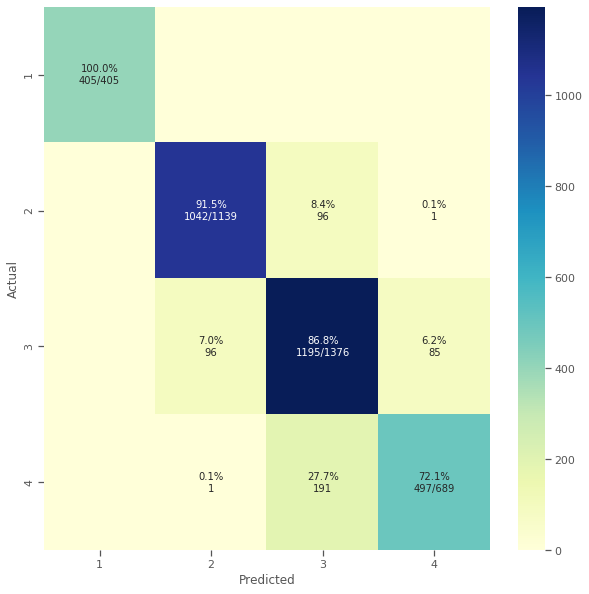

In [0]:
# A continuación se ejecuta función para graficar la matriz de confusion del modelo construido
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test3, y_pred)

In [0]:
#Finalmente se grafica las proporciones de cada una de las posiciones para validar la proporcion de cada una de las clases
by_pos = dfReg.groupby(dfReg['Position']).count().Crossing
by_pos.plot(kind='pie',figsize=(7,7), colors=['lime','red','blue','orange','gray'], labels=None, autopct='%1.1f%%', fontsize=16)
plt.legend(labels=dfReg['Position'].unique())
plt.title('Positions', fontsize=16)
plt.ylabel('')

NameError: ignored

#ANÁLISIS DE CARACTERÍSTICAS PRINCIPALES OVERALL

In [0]:
#El siguiente análisis no hace parte del alcance del trabajo, sin embargo se llevó a cabo para comparar los resultados con el trabajo 1 de selección de características

In [0]:
#Primero se establecen las variables a utilizar en el modelo de regresión de Random Forest.
columns_needed_rearranged2 = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'FKAccuracy', 'HeadingAccuracy', 'LongShots','Penalties', 'ShotPower', 'Volleys', 
       'ShortPassing', 'LongPassing',
       'Interceptions', 'Marking', 'SlidingTackle', 'StandingTackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'BallControl','Composure','Jumping', 
       'SprintSpeed','Position','Overall']
dfRegresion = df[columns_needed_rearranged2]
dfRegresion.head()

In [0]:
# A continuación se ejecuta una funcion para cambiar los nombres de las posiciones por variables numéricas
def label_pos_Regresion (row):
    
    if(row.Position == "RB" or row.Position == "CB" or row.Position == "LB" or 
       row.Position == "LWB" or row.Position == "RCB"or row.Position == "RWB" or 
       row.Position == "LCB"):
        return 1
    if(row.Position == "RW" or row.Position == "CF" or row.Position == "LW" or 
       row.Position == "ST" or row.Position == "RS"or row.Position == "LS"
       or row.Position == "LF"or row.Position == "RF"):
        return 2
    if(row.Position == "RM" or row.Position == "CM" or row.Position == "LM"
       or row.Position == "CAM" or row.Position == "LDM" or row.Position == "RDM"
      or row.Position == "LAM"or row.Position == "RAM" or row.Position == "CDM"
       or row.Position == "RCM"or row.Position == "LCM"):
        return 3
    
    

dfRegresion['Position'] = dfRegresion.apply (lambda row: label_pos_Regresion(row),axis=1)
dfRegresion = dfRegresion.dropna()

In [0]:
# A continuación se establecen los datos de entrenamiento y testeo
X_train_num_R, X_test_num_R, y_train_num_R, y_test_num_R = train_test_split(dfRegresion.iloc[:,:-1], dfRegresion.iloc[:,-1], test_size=0.2, random_state=0)
# Se normalizan los datos
from sklearn import preprocessing
X_train_scaled_num_R = preprocessing.scale(X_train_num_R)
X_test_scaled_num_R = preprocessing.scale(X_test_num_R)
# Se ejecuta el modelo de regresión
RForestR = RandomForestRegressor(random_state=0,max_depth=10,n_estimators=150,max_features='sqrt',oob_score=True ).fit(X_train_scaled_num_R, y_train_num_R)
RFscoreR = RForestR.score(X_test_scaled_num_R, y_test_num_R)
print ('Random Forest Accuracy Scaled (Custom Parameters): {}'.format(RFscoreR))
print ('Random Forest Oob Score Scaled (Custom Parameters): {}'.format(RForestR.oob_score_))

Random Forest Accuracy Scaled (Custom Parameters): 0.9598206007273877
Random Forest Oob Score Scaled (Custom Parameters): 0.9581702251496501


In [0]:
dfRegresion.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,FKAccuracy,HeadingAccuracy,LongShots,Penalties,ShotPower,Volleys,ShortPassing,LongPassing,Interceptions,Marking,SlidingTackle,StandingTackle,Strength,Vision,Acceleration,Agility,Reactions,Stamina,Balance,BallControl,Composure,Jumping,SprintSpeed,Position,Overall
0,48.0,84.0,93.0,97.0,95.0,94.0,70.0,94.0,75.0,85.0,86.0,90.0,87.0,22.0,33.0,26.0,28.0,59.0,94.0,91.0,91.0,95.0,72.0,95.0,96.0,96.0,68.0,86.0,2,94
1,63.0,84.0,81.0,88.0,94.0,76.0,89.0,93.0,85.0,95.0,87.0,81.0,77.0,29.0,28.0,23.0,31.0,79.0,82.0,89.0,87.0,96.0,88.0,70.0,94.0,95.0,95.0,91.0,2,94
2,56.0,79.0,88.0,96.0,87.0,87.0,62.0,82.0,81.0,80.0,84.0,84.0,78.0,36.0,27.0,33.0,24.0,49.0,87.0,94.0,96.0,94.0,81.0,84.0,95.0,94.0,61.0,90.0,2,92
4,76.0,93.0,85.0,86.0,82.0,83.0,55.0,91.0,79.0,91.0,82.0,92.0,91.0,61.0,68.0,51.0,58.0,75.0,94.0,78.0,79.0,91.0,90.0,77.0,91.0,88.0,63.0,76.0,3,91
5,54.0,81.0,83.0,95.0,84.0,79.0,61.0,80.0,86.0,82.0,80.0,89.0,83.0,41.0,34.0,22.0,27.0,66.0,89.0,94.0,95.0,90.0,83.0,94.0,94.0,91.0,56.0,88.0,2,91


In [0]:
#Visualización de las principales variables que afectan el Overall
imp_feat.sort_values(ascending=False)

Reactions          0.196604
Composure          0.127623
BallControl        0.120074
ShortPassing       0.088873
Dribbling          0.052040
Interceptions      0.050604
StandingTackle     0.048931
ShotPower          0.040399
Marking            0.034367
SlidingTackle      0.031658
LongShots          0.029991
HeadingAccuracy    0.028369
Crossing           0.026052
Vision             0.025107
LongPassing        0.016598
Finishing          0.016572
Aggression         0.011478
Strength           0.010676
Stamina            0.010456
Volleys            0.009517
Curve              0.006856
SprintSpeed        0.004077
Acceleration       0.003478
Jumping            0.002396
Penalties          0.001967
Agility            0.001690
Position           0.001665
Balance            0.001006
FKAccuracy         0.000875
dtype: float64